In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pyplot
import random
import seaborn as sb



In [154]:
import sklearn
from sklearn.datasets import fetch_california_housing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [196]:
calif = fetch_california_housing()
df = pd.DataFrame(calif['data'], columns=california['feature_names'])
target=pd.DataFrame(calif.target)

In [197]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [198]:
df.isnull().sum()


MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

In [206]:
rn = [(row, col) for row in range(df.shape[0]) for col in range(df.shape[1])]
for row, col in random.sample(rn, int(round(.1*len(rn)))):
    df.iat[row, col] = np.nan

In [207]:
df.isnull().sum()


MedInc        2044
HouseAge      2028
AveRooms      2074
AveBedrms     2144
Population    2058
AveOccup      2129
Latitude      2038
Longitude     1997
dtype: int64

In [208]:
df.fillna(df.mean(), inplace=True)


In [209]:
df.isnull().sum()


MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

In [210]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [211]:
df.dtypes


MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
dtype: object

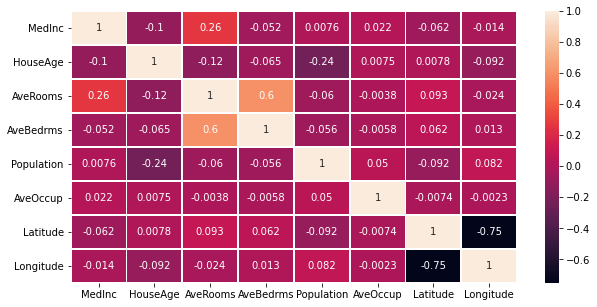

In [205]:
pyplot.figure(figsize=(10,5))
sb.heatmap(df.corr(), annot=True, linewidth= 1.0)

In [212]:
scaler= StandardScaler()
#scaler.fit(df)


In [213]:
data = scaler.fit_transform(df)
data

array([[ 2.74560622e+00,  1.15299959e+00, -7.27973813e-14, ...,
        -5.38268851e-02,  1.22506452e+00, -1.54829383e+00],
       [ 2.73094096e+00, -7.03152794e-01,  3.55340625e-01, ...,
        -1.37263122e-03,  1.21411386e+00,  2.21815125e-03],
       [-1.66198557e-03,  2.17388339e+00,  1.26850984e+00, ...,
        -1.37263122e-03,  1.20863853e+00, -1.55413287e+00],
       ...,
       [-1.33675772e+00, -1.07438327e+00, -4.31759561e-03, ...,
        -7.60412520e-02,  2.07374049e+00, -9.58551385e-01],
       [-1.23373121e+00,  3.46127017e-03, -4.94048582e-02, ...,
        -9.55991642e-02,  2.07374049e+00, -1.01694173e+00],
       [-9.12451164e-01,  1.70134951e-13, -8.27226020e-02, ...,
        -1.37263122e-03,  2.04088852e+00,  3.90824807e-12]])

In [218]:
pca=PCA(0.9)
#pca.fit(data)
pscaler= pca.fit_transform(data)
pca.n_components_


6

In [219]:
pca.explained_variance_ratio_


array([0.21829195, 0.20081959, 0.1493151 , 0.12774399, 0.12459709,
       0.09430709])

In [216]:
pscaler.shape

(20640, 6)

In [215]:
data.shape

(20640, 8)

In [217]:
pdata=pd.DataFrame(pscaler,columns=['col1','col2','col3','col4','col5', 'col6'])
new_data=pd.concat([pdata,target],axis=1)

new_data

,col1,col2,col3,col4,col5,col6,0
0,2.028390,-0.645899,-0.145184,2.738179,-1.146797,0.475618,4.526
1,0.838347,0.577880,1.424642,1.976600,-1.214151,-0.118557,3.585
2,2.426265,-0.696285,-1.481070,0.822557,0.174968,1.044788,3.521
3,1.947602,-0.550953,0.248650,1.080190,-0.635405,-0.348821,3.413
4,1.044082,-0.985102,-1.665994,0.617922,0.142818,0.844660,3.422
...,...,...,...,...,...,...,...
20635,1.913862,-0.844078,0.395312,-0.109874,-0.177124,-0.635731,0.781
20636,2.199343,-0.556864,0.176444,-0.850493,0.107561,-1.480300,0.771
20637,1.865925,-0.893867,0.610899,-1.362127,0.213178,-1.192520,0.923
20638,2.046923,-1.146488,-0.214326,-0.995795,0.312565,-0.615643,0.847
